In [1]:
from syotools.models import Telescope, Camera, PhotometricExposure, Source
import matplotlib.pyplot as plt

Warning, 5 of 20000 bins contained negative fluxes; they have been set to zero.


/Users/tumlinson/anaconda3/envs/hwotools/lib/python3.12/site-packages/pysynphot/units.py:824: RuntimeWarning: divide by zero encountered in log
  return -1.085736 * N.log(arg) + ABZERO


Warning, 3590 of 20000 bins contained negative fluxes; they have been set to zero.
Warning, 293 of 2920 bins contained negative fluxes; they have been set to zero.
Warning, 5 of 20000 bins contained negative fluxes; they have been set to zero.
Warning, 3590 of 20000 bins contained negative fluxes; they have been set to zero.
Warning, 293 of 2920 bins contained negative fluxes; they have been set to zero.


In [2]:
# create the basic objects 
hri, tel = Camera(), Telescope() 
tel.set_from_json('EAC1')
tel.add_camera(hri)
hri_exp = hri.create_exposure()

In [3]:
source1 = Source() 
source1.set_sed('Flat (AB)', 25., 0., 0.0, 'galex,fuv')   

In [4]:
source2 = Source() 
source2.set_sed('QSO', 25., 0.0, 0.0, 'galex,fuv')   

In [5]:
source3 = Source() 
source3.set_sed('G191B2B (WD)', 25., 0., 0.0, 'galex,fuv')   

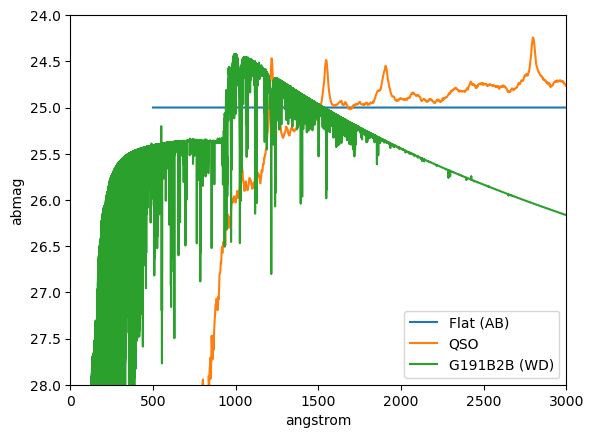

In [6]:
plt.plot(source1.sed.wave, source1.sed.flux, label=source1.name) 
plt.plot(source2.sed.wave, source2.sed.flux, label=source2.name) 
plt.plot(source3.sed.wave, source3.sed.flux, label=source3.name) 
plt.xlim(0, 3000) 
plt.ylim(28,24) 
plt.ylabel(source1.sed.fluxunits) 
plt.xlabel(source1.sed.waveunits) 
plt.legend() 

In [ ]:
source1

In [7]:
hri_exp.add_source(source1) 
hri_exp.add_source(source2) 
hri_exp.add_source(source3) 

In [9]:
hri_exp.source

Source(name='G191B2B (WD)', magnitude=25.0, redshift=0.0, extinction=0.0, redshift=galex,fuv) 

In [ ]:




exptime_list = []
for i in hri.bandnames: exptime_list.append(exptime) 
    hri_exp.exptime[1]['value'] = exptime_list 

    #Print the current template & mode
    if not silent: 
        print("Current SED template: {}".format(hri_exp.sed_id)) 
        print("Current exposure time: {} hours\n".format(hri_exp.exptime[1]['value'][0])) 
    
    hri_exp.enable()
    snr = hri_exp.recover('snr')
    hri_sed, hri_snr = hri_exp.recover('sed', 'snr')  
    hri_snr = hri_exp.snr[1]['value']

    if not silent: 
        for bb, ss in zip(hri.bandnames, hri_snr): print("{}, SNR = {}".format(bb, ss)) 
